## Ensemble Methods

Construct a set of classifiers that can often have a better predictive performance than any of its individual members

Goal: Combine different classifiers into a meta-classifier that has better generalization performance than each individual classifier alone

Example: collection opinions from 10 experts: ensemble methods allow us to strategically combine these predictions by the 10 experts to come up with a prediction that is more accurate and robust than the predictions by each individual expert


## Majority Voting

Ensemble methods tend to use the majority voting principle, where the class with the most votes is selected, 50% or more votes

We can also generalize to multiple classes via plurality voting, where we select the class label that received the most votes

## Steps for  Ensemble Classification

1. Begin by training m different classifiers (C1, ..., Cm) -- the ensemble can be built from different classification algorithms. E.g. you can mix logistic regression, SVM, decision trees, K-NN, etc. We can also use the same base classification algorithm fitting different subsets of training data, as in random forests, with different decision tree classifiers.
2. Predict a class label via a simple majority or plurality vote by combining the class labels of each individual classifier and selecting the class lbel that received the most votes: yhat = mode{C1(x), C2(x), ..., Cm(x)}
3. For example, a binary classifcation task where class 1 = -1 and class 2 = +1, we can write majority vote preidction: C(x) = sign[∑j...m Cj(x)] = 1 if ∑iCj(x) >= 0 else -1 where we sume over each classifier's prediction and if it's >= 0 then we predict class 1 as majority else we predict class 0 as majority

## Why Are Ensemble Methods Better Than Single Classifiers?

Assume all n base classifiers for a binary classification task have an equal error rate of E. Assume independence in these classifiers and the error rates are not correlated. We can express the error probability of an esnemble of base classifiers as a probability mass function of a binomial distribution ∑nk <n choose k>* e^k(1-e)^n-k = e of ensemble

Ex: 11 base classifiers, each with an error rate of 0.25

∑k=6 to 11 <11 k> 0.25^k * (1-E)^11-k = 0.034

Error rate of the ensemble is much lower than the error rate of each individual classifier if all assumptions are met. Normally all assumptions are not met, however, but randomization can help us attain better performance. 

Let's compare a base classifier over a range of different base error rates

In [252]:
from scipy.misc import comb # number of combinations something can take at one time
                            # The number of combinations of N things taken k at a time.
                            # This is often expressed as “N choose k”.
import math

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.0))
    probs = [comb(n_classifier, k) * error ** k *(1-error)**(n_classifier-k) for k in range(k_start, n_classifier+1)]
    return sum(probs)
ensemble_error(n_classifier=11, error=0.25)

0.034327507019042969

Now graph ensemble error rates for a range of different base errors from 0.0 to 1.0

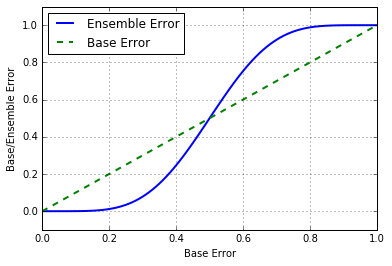

In [251]:
import numpy as np
error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(error_range, ens_errors, label = 'Ensemble Error', linewidth = 2)
plt.plot(error_range, error_range, linestyle = '--', label = 'Base Error', linewidth = 2)
plt.xlabel('Base Error')
plt.ylabel('Base/Ensemble Error')
plt.legend(loc='upper left')
plt.ylim(-0.1,1.1)
plt.grid()
plt.show()

By plotting the errors based on the probability mass function, we can see that as long as the base classifier error is < 0.5, we can expect our ensemble method to perform better

## Implementing A Simply Majority Vote Classifier

Combine different classification algorithms associated with individual weights for confidence. Goal: build a stronger meta-classifier that balances out the individual classifiers' weaknesses on a particular dataset.

Weighted majority vote:  yhat = argmaxi ∑j=1..m models wj*Xa(Cj(x)=i)

where wj is a weight associated with the base classifier, Cj, yhat is the predicted class label of the ensemble, Xa is the characteristic function [Cj(x) = i set of A and A is a set of unique class labels

for equal weights, we can simplify to:
    yhat = mode(C1(x), C2(x), ..., Cm(x))
    
Ex: ensemble of three base classifiers cj(j{0,1}) and want to predict the class label of a given sample instance x. 

2/3 predict class 0 and classifier 3 (c3) predicts 1. If we weight the predictions equally, the majority vote will predict the sample belongs to class 0:
Say model 1 predicts 0, model 2 predicts 0 and model 3 predicts 1
    C1(x) = 0, C2(x) = 0, C3(x) = 1   yhat = mode{0,0,1} = 0
    
Now assign a weight of 0.6 to c3, and a weight of 0.2 to c1 and c2
    yhat = argmaxi[(0.2*i0)+(0.2*i0)+(0.6*i1)] = 1
    yhat = mode(0,0,1,1,1) = 1 1 is three times more likely

In [108]:
import numpy as np
print np.bincount([0,0,1])
np.argmax(np.bincount([0,0,1], weights =[0.2,0.2,0.6]))

[2 1]


1

In [109]:
np.argmax([1,2,3,4]) # returns the INDEX of the max value

3

Classifiers can also return the probability of a predicted class label via the predict_proba method

Using the predicted class probabilities instead of the class labels for majority voting can be useful if the classifiers in our ensemble are well calibrated

The majority vote based on probabilities can be edited as:
    yhat = argmaxi ∑j=1..m wj*pij 
    
Where pij is the predicted probability of the jth classifier for class label i

3 classifiers, classifying a binary outcome, for a particular sample x:
    C1(x) [0.9, 0.1], C2(x) [0.8, 0.2], C3(x) [0.4, 0.6] 
    
We can calculate the individual class probabilities as follows:
    p(i0|x) = 0.2 * 0.9 + 0.2*0.8 + 0.6*0.4 = 0.58
    p(i1|x) = 0.2*0.1 + 0.2*0.2 + 0.6*0.6 = 0.42
    yhat = argmax[p(i0|x), p(i1|x)] = 0
    
We predict class 0 based on probabilities

In [110]:
ex = np.array([[0.9, 0.1],
              [0.8, 0.2],
              [0.4, 0.6]])

p = np.average(ex, axis=0) # computes the weighted avg along the specified axis
p

array([ 0.7,  0.3])

In [111]:
np.average([0.2,0.5,0.7], weights = [0.5, 0.2, 0.3])

0.41000000000000003

In [112]:
# demo of argmax, returns index position containing largest value
# can search over different axes, 0 calculates over columns, 1 calculates over rows as usual
a = np.arange(6).reshape(2,3)
print a
print np.argmax(a)
print np.argmax(a, axis=0)
print np.argmax(a, axis=1)

[[0 1 2]
 [3 4 5]]
5
[1 1 1]
[2 2]


In [113]:
# Let's create our OWN majority classifier

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers, vote='classlabel',weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key:value for key,value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
    
    def fit(self, X, y):
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
   
    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, axis=1, arr=predictions)))
        maj_vote = self.labelenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [114]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
iris = datasets.load_iris()
X, y = iris.data[50:,[1,2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) # can stratify here


In [115]:
# now train three classifiers: logistic regression, decision tree and k-nn and look @ performance on 10 fold CV

from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=0)
clf2 = DecisionTreeClassifier(max_depth = 1, criterion = 'entropy', random_state = 0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski') # use L2 norm
clf4 = RandomForestClassifier(max_depth = 3, n_estimators = 150, random_state = 0)

# now let's use a voting classifier, pretty fking COOL!
pipe1 = Pipeline ([['sc', StandardScaler()], ['clf', clf1]]) # set up a pipe to standardize for logistic
pipe3 = Pipeline([['sc', StandardScaler()], ['clf',clf3]]) # set up another pipe to standardize for KNN
clf5 = VotingClassifier(estimators=[('lr', pipe1), ('dtree', clf2), ('knn', pipe3)], voting='soft')
clf_labels = ['Logistic', 'Decision Tree', 'KNN', 'RFC', 'VotingClassifier']

print '10 fold CV:\n'

for clf, label in zip([pipe1, clf2, pipe3, clf4, clf5], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc') # training validation
    print('ROC AUC: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label))

10 fold CV:

ROC AUC: 0.92 (+/- 0.20) [Logistic]
ROC AUC: 0.92 (+/- 0.15) [Decision Tree]
ROC AUC: 0.93 (+/- 0.10) [KNN]
ROC AUC: 0.95 (+/- 0.15) [RFC]
ROC AUC: 0.97 (+/- 0.10) [VotingClassifier]


Our voting classifier performs the best, by far, with the least standard deviation across our folds

In [116]:
all_clf = [pipe1, clf2, pipe3, clf4, clf5]

Logistic Regression and K-NN using the euclidean distance are not scale invariant, so we must transform them, hence the pipeline

Now let's combine the classifiers

In [117]:
'''
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority Voting']
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y= y_train, cv=10, scoring = 'roc_auc')
    print 'Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label)
'''

"\nmv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])\nclf_labels += ['Majority Voting']\nfor clf, label in zip(all_clf, clf_labels):\n    scores = cross_val_score(estimator=clf, X=X_train, y= y_train, cv=10, scoring = 'roc_auc')\n    print 'Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label)\n"

Now let's plot an ROC curve

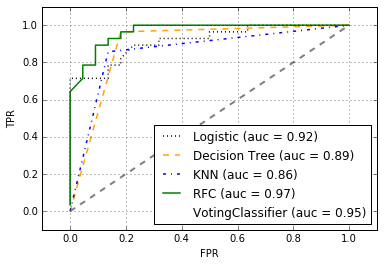

In [118]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black','orange','blue','green','red']
linestyles = [':','--','-.','-',""]
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    # assuming positive class is 1
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true= y_test, y_score=y_pred) # get false positive rate, true positive rate
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color = clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc), linewidth=1.5)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [119]:
y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
y_pred

array([ 0.80759928,  0.80626096,  0.80550269,  0.81010301,  0.80799205,
        0.16471057,  0.16662598,  0.80664771,  0.47101216,  0.80685021,
        0.80550269,  0.16413359,  0.1650851 ,  0.80760537,  0.80550269,
        0.16432997,  0.16336945,  0.16490088,  0.80664771,  0.16221591,
        0.4725622 ,  0.80512202,  0.80627314,  0.80684412,  0.16394331,
        0.16682544,  0.8078048 ,  0.47255915,  0.1652876 ,  0.16529064,
        0.81067353,  0.80608281,  0.80741506,  0.80627314,  0.47217849,
        0.16508815,  0.16223113,  0.80914584,  0.49937918,  0.16605194,
        0.80780784,  0.80684107,  0.47236882,  0.16605498,  0.80569606,
        0.16624227,  0.16548096,  0.80627619,  0.80512507,  0.80742724])

Interestingly, decisionr egions of the ensemble classifier seem to be a hybrid of the decisionr egions from the individual classifiers

In [120]:
from sklearn.grid_search import GridSearchCV
params = {'max_depth':[1,2,3,4]}
grid = GridSearchCV(estimator=clf4, param_grid=params,cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=0)

In [121]:
for params, mean_score, scores in grid.grid_scores_:
    print '%0.3f +/- %0.2f %r' % (mean_score, scores.std()/2, params)

0.900 +/- 0.15 {'max_depth': 1}
0.950 +/- 0.07 {'max_depth': 2}
0.950 +/- 0.07 {'max_depth': 3}
0.950 +/- 0.07 {'max_depth': 4}


In [122]:
clf5.get_params(deep=True) # deep = True will let us see how to reference the different models and parameters
# in a grid search

{'dtree': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
             max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 'dtree__class_weight': None,
 'dtree__criterion': 'entropy',
 'dtree__max_depth': 1,
 'dtree__max_features': None,
 'dtree__max_leaf_nodes': None,
 'dtree__min_samples_leaf': 1,
 'dtree__min_samples_split': 2,
 'dtree__min_weight_fraction_leaf': 0.0,
 'dtree__presort': False,
 'dtree__random_state': 0,
 'dtree__splitter': 'best',
 'estimators': [('lr',
   Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=

In [123]:
params = {'dtree__max_depth':[1,2,3], 'knn__clf__n_neighbors':[1,2,3,4], 'lr__clf__C':[0.001, 0.01, 0.1, 1, 2, 5] }

In [124]:
grid = GridSearchCV(estimator = clf5, param_grid = params, cv=10, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=VotingClassifier(estimators=[('lr', Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0...ki',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')]]))],
         voting='soft', weights=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'lr__clf__C': [0.001, 0.01, 0.1, 1, 2, 5], 'dtree__max_depth': [1, 2, 3], 'knn__clf__n_neighbors': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [125]:
# now let's run a grid search over all of the models adjusting parameters and grabbing an AUC score

for params, mean_score, scores in grid.grid_scores_:
    print '%0.3f +/- %0.2f %r' %(mean_score, scores.std()/2, params)

0.967 +/- 0.05 {'lr__clf__C': 0.001, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 1}
0.967 +/- 0.05 {'lr__clf__C': 0.01, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 1}
0.967 +/- 0.05 {'lr__clf__C': 0.1, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 1}
1.000 +/- 0.00 {'lr__clf__C': 1, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 1}
1.000 +/- 0.00 {'lr__clf__C': 2, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 1}
1.000 +/- 0.00 {'lr__clf__C': 5, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 1}
0.967 +/- 0.05 {'lr__clf__C': 0.001, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 2}
0.967 +/- 0.05 {'lr__clf__C': 0.01, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 2}
0.967 +/- 0.05 {'lr__clf__C': 0.1, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 2}
1.000 +/- 0.00 {'lr__clf__C': 1, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 2}
1.000 +/- 0.00 {'lr__clf__C': 2, 'dtree__max_depth': 1, 'knn__clf__n_neighbors': 2}
1.000 +/- 0.00 {'lr__clf__C': 5, 'dtree__max_depth': 1, 'k

In [126]:
pipe3.get_params(deep=True)

{'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=1, p=2,
            weights='uniform'),
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': 1,
 'clf__n_neighbors': 1,
 'clf__p': 2,
 'clf__weights': 'uniform',
 'sc': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'steps': [['sc', StandardScaler(copy=True, with_mean=True, with_std=True)],
  ['clf',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=1, n_neighbors=1, p=2,
              weights='uniform')]]}

## Now let's play with a K-Nearest Neighbors

In [127]:
params = {'clf__p':[1,2,99],'clf__n_neighbors':[1,2,3,4,5]} # set up parameters to pass to GridSearch
grid = GridSearchCV(estimator = pipe3, param_grid=params, cv=10, scoring='roc_auc') # set up GridSearch object w/score
grid.fit(X_train, y_train) # fit them all

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')]]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__n_neighbors': [1, 2, 3, 4, 5], 'clf__p': [1, 2, 99]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [128]:
grid.grid_scores_

[mean: 0.93333, std: 0.10408, params: {'clf__p': 1, 'clf__n_neighbors': 1},
 mean: 0.93333, std: 0.10408, params: {'clf__p': 2, 'clf__n_neighbors': 1},
 mean: 0.93333, std: 0.10408, params: {'clf__p': 99, 'clf__n_neighbors': 1},
 mean: 0.93333, std: 0.10408, params: {'clf__p': 1, 'clf__n_neighbors': 2},
 mean: 0.93333, std: 0.10408, params: {'clf__p': 2, 'clf__n_neighbors': 2},
 mean: 0.93333, std: 0.10408, params: {'clf__p': 99, 'clf__n_neighbors': 2},
 mean: 0.92500, std: 0.12047, params: {'clf__p': 1, 'clf__n_neighbors': 3},
 mean: 0.92500, std: 0.12047, params: {'clf__p': 2, 'clf__n_neighbors': 3},
 mean: 0.92500, std: 0.12047, params: {'clf__p': 99, 'clf__n_neighbors': 3},
 mean: 0.93333, std: 0.15275, params: {'clf__p': 1, 'clf__n_neighbors': 4},
 mean: 0.95000, std: 0.15000, params: {'clf__p': 2, 'clf__n_neighbors': 4},
 mean: 0.95000, std: 0.15000, params: {'clf__p': 99, 'clf__n_neighbors': 4},
 mean: 0.93333, std: 0.15275, params: {'clf__p': 1, 'clf__n_neighbors': 5},
 mean: 0

In [136]:
print grid.best_params_, '\n',grid.best_score_, '\n', grid.best_estimator_

{'clf__p': 2, 'clf__n_neighbors': 4} 
0.95 
Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')]])


## Ensemble Method: Bagging

Closely related to the MajorityVoteClassifier except we resample or bootstrap sample from the entire dataset and train classifiers on each bootstrap

Random samples with replacement, bagging is short for bootstrap aggregating

Each bootstrap sample is used to fit a classifier Cj, which is most typically an unpruned decision tree (a maxed out decision tree)

Random forests are a special case of bagging where we also use random feature subsets to fit the individual decision trees

Bagging can improve the accuracy of unstabe models and decrease the degree of overfitting


In [137]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [143]:
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of Ash','Magnesium','Total phenols',
                   'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315',
                  'Proline']
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol','Hue']].values

In [144]:
# encode the labels appropriately
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split # set up initial split for training and testing
le = LabelEncoder() # instantiate an encoder
y = le.fit_transform(y)

In [157]:
# set up train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1, stratify = y)

In [164]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True,
                       bootstrap_features=False, n_jobs=-1, random_state=1)
# we pass our unpruned tree object to the bagging classifier

In [165]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print 'Decision tree train/test accuracies %.3f / %.3f' %(tree_train, tree_test)

Decision tree train/test accuracies 1.000 / 0.875


We see some overfitting with our decision tree, because we let it max out

In [166]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print 'Bagging train/test accuracies %.3f/%.3f' %(bag_train, bag_test)

Bagging train/test accuracies 1.000/0.896


The training accuracies of the decision tree and bagging classifier are similar on the training set, the bagging classifier does not overfit the test set as much as the decision tree, it has better generalization performance as estimated by the test_set


[0 0 0 ..., 0 0 0]
[1 1 1 ..., 0 0 0]


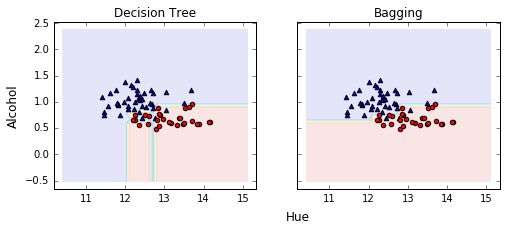

In [265]:
# goal here is to predict each point on the grid given the range of values we are plotting
# a contour fill will allow us to encode the decision regions by getting the result of each individual prediction
# we receive for every x,y point on the chart
# set axes for each feature
x_min = X_train[:,0].min()-1
x_max = X_train[:,0].max()+1
y_min = X_train[:,1].min()-1
y_max = X_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8,3))
for idx, clf, tt in zip([0,1], [tree,bag], ['Decision Tree','Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # predict each instance on the grid as 0,1, form a dataset
                                                   # by passing in flattened array for xx and yy dimensions
                                                   # then use .c_ to concatenate both arrays
    print Z
    Z = Z.reshape(xx.shape) # reshape Z results to fit the grid points and prepare for contour
    axarr[idx].contourf(xx, yy, Z, alpha=0.1) # contourfill the points @ xx, yy Z to show decision boundaries
    axarr[idx].scatter(X_train[y_train==0,0],
                       X_train[y_train==0,1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1,0],
                       X_train[y_train==1,1],
                       c='red', marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol',fontsize=12)
plt.text(10.2,-1.2,s='Hue',ha='center',va='center',fontsize=12)
plt.show()    

More complex classification tasks and datasets' high dimensionality can easily lea to overfitting in single decision trees and this is where the bagging algorithm can really play out its strengths. Bagging is ineffective in reducing model bias, which is why we want to choose an ensemble of classifiers with with low bias, for example, unpruned decision trees.

In [266]:
test = [[1,2,3],
       [4,5,6],
       [7,8,9]]

np.ravel(test) # returns one flattened array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [247]:
np.arange(y_min, y_max, 0.1)

array([-0.52, -0.42, -0.32, -0.22, -0.12, -0.02,  0.08,  0.18,  0.28,
        0.38,  0.48,  0.58,  0.68,  0.78,  0.88,  0.98,  1.08,  1.18,
        1.28,  1.38,  1.48,  1.58,  1.68,  1.78,  1.88,  1.98,  2.08,
        2.18,  2.28,  2.38])

In [271]:
print np.c_[xx.ravel(), yy.ravel()].shape, '\n' # Translates slice objects to concatenation along the second axis.
print np.c_[xx.ravel(), yy.ravel()]

(1440, 2) 

[[ 10.41  -0.52]
 [ 10.51  -0.52]
 [ 10.61  -0.52]
 ..., 
 [ 14.91   2.38]
 [ 15.01   2.38]
 [ 15.11   2.38]]


In [261]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([1, 2, 3, 0, 0, 4, 5, 6])

(30, 48)